In [ ]:
!pip install --upgrade google-api-python-client

In [ ]:
!pip install --upgrade google-auth google-auth-oauthlib google-auth-httplib2

In [1]:
import os

import google.oauth2.credentials

from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from google_auth_oauthlib.flow import InstalledAppFlow
import pandas as pd
import pprint 
import matplotlib.pyplot as plt
import seaborn as sns

# The CLIENT_SECRETS_FILE variable specifies the name of a file that contains
# the OAuth 2.0 information for this application, including its client_id and
# client_secret.
CLIENT_SECRETS_FILE = "client_secret.json"

# This OAuth 2.0 access scope allows for full read/write access to the
# authenticated user's account and requires requests to use an SSL connection.

DEVELOPER_KEY = "YOUR DEVELOPER KEY"
API_SERVICE_NAME = 'youtube'
API_VERSION = 'v3'

def youtube_search(q=None, max_results=50,order="viewCount", token=None, location=None, location_radius=None):

    youtube = build(API_SERVICE_NAME, API_VERSION,developerKey=DEVELOPER_KEY)

    search_response = youtube.search().list(
    q=q,
    type="video",
    pageToken=token,
    order = order,
    part="id,snippet", # Part signifies the different types of data you want 
    maxResults=max_results,
    location=location,
    locationRadius=location_radius).execute()
    

    title = []
    channelId = []
    channelTitle = []
    categoryId = []
    videoId = []
    viewCount = []
    likeCount = []
    dislikeCount = []
    commentCount = []
    category = []
    tags = []
    videos = []
    publishedAt = []
    
    for search_result in search_response.get("items", []):
        if search_result["id"]["kind"] == "youtube#video":
            try:
                videoId.append(search_result['id']['videoId'])
            except:
                return {}
            try:
                title.append(search_result['snippet']['title'])
            except:
                title.append(None)

            response = youtube.videos().list(
                part='statistics, snippet',
                id=search_result['id']['videoId']).execute()
            
            try:
                channelId.append(response['items'][0]['snippet']['channelId'])
            except:
                channelId.append(None)
            try:
                channelTitle.append(response['items'][0]['snippet']['channelTitle'])
            except:
                channelTitle.append(None)
            try:
                publishedAt.append(response['items'][0]['snippet']['publishedAt'])
            except:
                publishedAt.append(None)
            try:
                categoryId.append(response['items'][0]['snippet']['categoryId'])
            except:
                categoryId.append(None)
            try:
                viewCount.append(response['items'][0]['statistics']['viewCount'])
            except:
                viewCount.append(None)
            try:
                likeCount.append(response['items'][0]['statistics']['likeCount'])
            except:
                likeCount.append(None)
            try:
                dislikeCount.append(response['items'][0]['statistics']['dislikeCount'])
            except:
                dislikeCount.append(None)
                              
 
        if 'commentCount' in response['items'][0]['statistics'].keys():
            commentCount.append(response['items'][0]['statistics']['commentCount'])
        else:
            commentCount.append(None)
            
        if 'tags' in response['items'][0]['snippet'].keys():
            tags.append(response['items'][0]['snippet']['tags'])
        else:
            tags.append(None)
        
        if type(search_response.get('nextPageToken', None))== str:
            token = search_response.get('nextPageToken', None)
        else:
            return {}

    youtube_dict = {'tags':tags,'channelId': channelId,'channelTitle': channelTitle,'categoryId':categoryId,'title':title,'videoId':videoId,'viewCount':viewCount,'likeCount':likeCount,'dislikeCount':dislikeCount,'commentCount':commentCount, 'publishedAt':publishedAt}

    return {'result':youtube_dict, 'token':token}

In [2]:
data = youtube_search()['result']
data.keys()

dict_keys(['tags', 'channelId', 'channelTitle', 'categoryId', 'title', 'videoId', 'viewCount', 'likeCount', 'dislikeCount', 'commentCount', 'publishedAt'])

In [3]:
df = pd.DataFrame(youtube_search()['result'])
token=youtube_search()['token']

In [4]:
for i in range(200):
    df = df.append(pd.DataFrame(youtube_search(token=token)['result']), ignore_index=True)
    token=youtube_search(token=token)['token']

In [72]:
youtube_search(token=token)['result'].keys()

dict_keys(['tags', 'channelId', 'channelTitle', 'categoryId', 'title', 'videoId', 'viewCount', 'likeCount', 'dislikeCount', 'commentCount', 'publishedAt'])

In [5]:
df

,categoryId,channelId,channelTitle,commentCount,dislikeCount,likeCount,publishedAt,tags,title,videoId,viewCount
0,10,UCLp8RBhQHu9wSsq62j_Md6A,LuisFonsiVEVO,2538568,3319892,28617878,2017-01-13T05:00:02.000Z,"[Luis, Fonsi, Despacito, UMLE, Latino, Latin, ...",Luis Fonsi - Despacito ft. Daddy Yankee,kJQP7kiw5Fk,5284819665
1,10,UCVp3nfGRxmMadNDuVbJSk8A,Wiz Khalifa,1453069,685022,20578196,2015-04-07T03:00:03.000Z,"[Wiz Khalifa, Blacc Hollywood, Taylor Gang, At...",Wiz Khalifa - See You Again ft. Charlie Puth [...,RgKAFK5djSk,3641854738
2,10,UC0C-w0YjGpqDXGB8IHb662A,Ed Sheeran,749757,956254,16809505,2017-01-30T10:57:50.000Z,"[edsheeran, ed sheeran, acoustic, live, cover,...",Ed Sheeran - Shape of You [Official Video],JGwWNGJdvx8,3604402347
3,10,UCrDkAvwZum-UTjHmzDI2iIw,officialpsy,5211086,2057783,14496683,2012-07-15T07:46:32.000Z,"[PSY, 싸이, 강남스타일, 뮤직비디오, Music Video, Gangnam S...",PSY - GANGNAM STYLE(강남스타일) M/V,9bZkp7q19f0,3169617619
4,10,UCmfFGTSsfJVu6CGvL8r75qg,MarkRonsonVEVO,428026,689468,10959219,2014-11-19T14:00:18.000Z,"[Mark Ronson, daffodils, Mark Ronson & The Bus...",Mark Ronson - Uptown Funk ft. Bruno Mars,OPf0YbXqDm0,3112911778
5,10,UCN1hnUccO4FD5WfM7ithXaw,Maroon5VEVO,289293,411617,8645151,2015-01-14T15:00:11.000Z,"[Maroon, Sugar, Maroon 5, maroon 5 don't wanna...",Maroon 5 - Sugar,09R8_2nJtjg,2651958287
6,10,UCANLZYMidaCbLQFWXBC95Jg,TaylorSwiftVEVO,473399,860921,7512729,2014-08-18T21:18:00.000Z,"[Taylor, Swift, Shake, It, Off, Big, Machine, ...",Taylor Swift - Shake It Off,nfWlot6h_JM,2585427110
7,10,UC-8Q-hLdECwQmaWNwXitYDw,KatyPerryVEVO,627001,684111,8187066,2013-09-05T20:00:22.000Z,"[Katy perry, roar, music video, official, roar...",Katy Perry - Roar (Official),CevxZvSJLk8,2547081001
8,10,UCVttQE6tS_agDSAU61Q65aA,EnriqueIglesiasVEVO,183483,428305,5570346,2014-04-11T07:00:01.000Z,"[Enrique, Iglesias, Bailando, bailando solo lo...",Enrique Iglesias - Bailando (Español) ft. Desc...,NUsoVlDFqZg,2524397628
9,10,UC0C-w0YjGpqDXGB8IHb662A,Ed Sheeran,263857,397917,8753717,2014-10-07T13:57:37.000Z,"[edsheeran, ed sheeran, acoustic, live, cover,...",Ed Sheeran - Thinking Out Loud [Official Video],lp-EO5I60KA,2369981296


In [6]:
import numpy as np
numeric_dtype = ['categoryId','viewCount','commentCount','likeCount','dislikeCount']
for i in numeric_dtype:
    df[i] = pd.to_numeric(df[i], errors='ignore')
df = df.sort_values(ascending=False,by='viewCount')

In [7]:
df

,categoryId,channelId,channelTitle,commentCount,dislikeCount,likeCount,publishedAt,tags,title,videoId,viewCount
0,10,UCLp8RBhQHu9wSsq62j_Md6A,LuisFonsiVEVO,2538568.0,3319892.0,28617878.0,2017-01-13T05:00:02.000Z,"[Luis, Fonsi, Despacito, UMLE, Latino, Latin, ...",Luis Fonsi - Despacito ft. Daddy Yankee,kJQP7kiw5Fk,5.284820e+09
1,10,UCVp3nfGRxmMadNDuVbJSk8A,Wiz Khalifa,1453069.0,685022.0,20578196.0,2015-04-07T03:00:03.000Z,"[Wiz Khalifa, Blacc Hollywood, Taylor Gang, At...",Wiz Khalifa - See You Again ft. Charlie Puth [...,RgKAFK5djSk,3.641855e+09
2,10,UC0C-w0YjGpqDXGB8IHb662A,Ed Sheeran,749757.0,956254.0,16809505.0,2017-01-30T10:57:50.000Z,"[edsheeran, ed sheeran, acoustic, live, cover,...",Ed Sheeran - Shape of You [Official Video],JGwWNGJdvx8,3.604402e+09
3,10,UCrDkAvwZum-UTjHmzDI2iIw,officialpsy,5211086.0,2057783.0,14496683.0,2012-07-15T07:46:32.000Z,"[PSY, 싸이, 강남스타일, 뮤직비디오, Music Video, Gangnam S...",PSY - GANGNAM STYLE(강남스타일) M/V,9bZkp7q19f0,3.169618e+09
4,10,UCmfFGTSsfJVu6CGvL8r75qg,MarkRonsonVEVO,428026.0,689468.0,10959219.0,2014-11-19T14:00:18.000Z,"[Mark Ronson, daffodils, Mark Ronson & The Bus...",Mark Ronson - Uptown Funk ft. Bruno Mars,OPf0YbXqDm0,3.112912e+09
5,10,UCN1hnUccO4FD5WfM7ithXaw,Maroon5VEVO,289293.0,411617.0,8645151.0,2015-01-14T15:00:11.000Z,"[Maroon, Sugar, Maroon 5, maroon 5 don't wanna...",Maroon 5 - Sugar,09R8_2nJtjg,2.651958e+09
6,10,UCANLZYMidaCbLQFWXBC95Jg,TaylorSwiftVEVO,473399.0,860921.0,7512729.0,2014-08-18T21:18:00.000Z,"[Taylor, Swift, Shake, It, Off, Big, Machine, ...",Taylor Swift - Shake It Off,nfWlot6h_JM,2.585427e+09
7,10,UC-8Q-hLdECwQmaWNwXitYDw,KatyPerryVEVO,627001.0,684111.0,8187066.0,2013-09-05T20:00:22.000Z,"[Katy perry, roar, music video, official, roar...",Katy Perry - Roar (Official),CevxZvSJLk8,2.547081e+09
8,10,UCVttQE6tS_agDSAU61Q65aA,EnriqueIglesiasVEVO,183483.0,428305.0,5570346.0,2014-04-11T07:00:01.000Z,"[Enrique, Iglesias, Bailando, bailando solo lo...",Enrique Iglesias - Bailando (Español) ft. Desc...,NUsoVlDFqZg,2.524398e+09
9,10,UC0C-w0YjGpqDXGB8IHb662A,Ed Sheeran,263857.0,397917.0,8753717.0,2014-10-07T13:57:37.000Z,"[edsheeran, ed sheeran, acoustic, live, cover,...",Ed Sheeran - Thinking Out Loud [Official Video],lp-EO5I60KA,2.369981e+09


Now, we have the data ready in our favourite DataFrame format, world is your oyster. Enjoy testing all the craziest hypothesis you have ever thought of.

In [8]:
catID = df['categoryId'].unique()

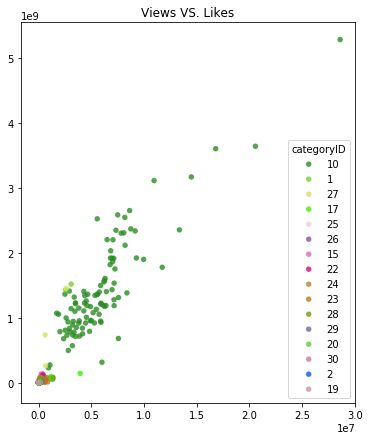

In [9]:
data = []
colors = []
groups = []
for ID in catID:
    data.append((df.loc[df['categoryId']==ID]['likeCount'], df.loc[df['categoryId']==ID]['viewCount']))
    colors.append(np.random.rand(3,))
    groups.append(ID)
 
# Create plot
fig = plt.figure(figsize=(6,7))
ax = fig.add_subplot(1, 1, 1)
 
for dat, color, group in zip(data, colors, groups):
    x, y = dat
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
 
plt.title('Views VS. Likes')
plt.legend(title='categoryID',loc=0)
plt.show()

In [10]:
df.to_csv('popular_videos.csv', encoding='utf-8')